##### Cross_task_neural_signal_analysis

(1) compare the mean spike count across tasks

In [31]:
# 自动加载python模块，不需要手动重启kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%cd /home/zsongah/tVAE_across_task_rat25_v2 
from configs.config import get_config
from data.dataset import Dataset
import matplotlib.pyplot as plt
import torch

/home/zsongah/tVAE_across_task_rat25_v2


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rat = '025'
latent_dim = 6
task_1mc = '1MC'
task_2mc = '2MC'
day_1mc = '2020-07-16' # 数字之间加下划线不识别
day_2mc = '2020-10-05'
# stVAE/LFADS
proj_name_1mc = 'stVAE' # 加载不同模型
config_file = proj_name_1mc
test_fold = 0
config_1mc = get_config(config_file, [
    'DATA.RAT', rat,
    'DATA.TASK', task_1mc,
    'DATA.DAY', day_1mc, # can not use number_number 
    'DATA.TEST_FOLD', test_fold,
    'MODEL.LATENT_DIM', latent_dim,
])
config_2mc = get_config(config_file, [
    'DATA.RAT', rat,
    'DATA.TASK', task_2mc,
    'DATA.DAY', day_2mc, # can not use number_number 
    'DATA.TEST_FOLD', test_fold,
    'MODEL.LATENT_DIM', latent_dim,
])
dataset_1mc = Dataset(config_1mc, rat, day_1mc, task_1mc, test_fold, device)
dataset_2mc = Dataset(config_2mc, rat, day_2mc, task_2mc, test_fold, device)
MC1_spikes = dataset_1mc.data_preprocessed['spikes'][:16,:]
MC1_actions = dataset_1mc.data_preprocessed['actions']
MC2_spikes = dataset_2mc.data_preprocessed['spikes'][:16,:]
MC2_actions = dataset_2mc.data_preprocessed['actions']

| load neural data | train length: 8121, trial: 108 | test length: 2433 , trial: 26 | 32 total neurons | 16 M1 neurons | 
| load neural data | train length: 13438, trial: 141 | test length: 3814 , trial: 35 | 32 total neurons | 16 M1 neurons | 


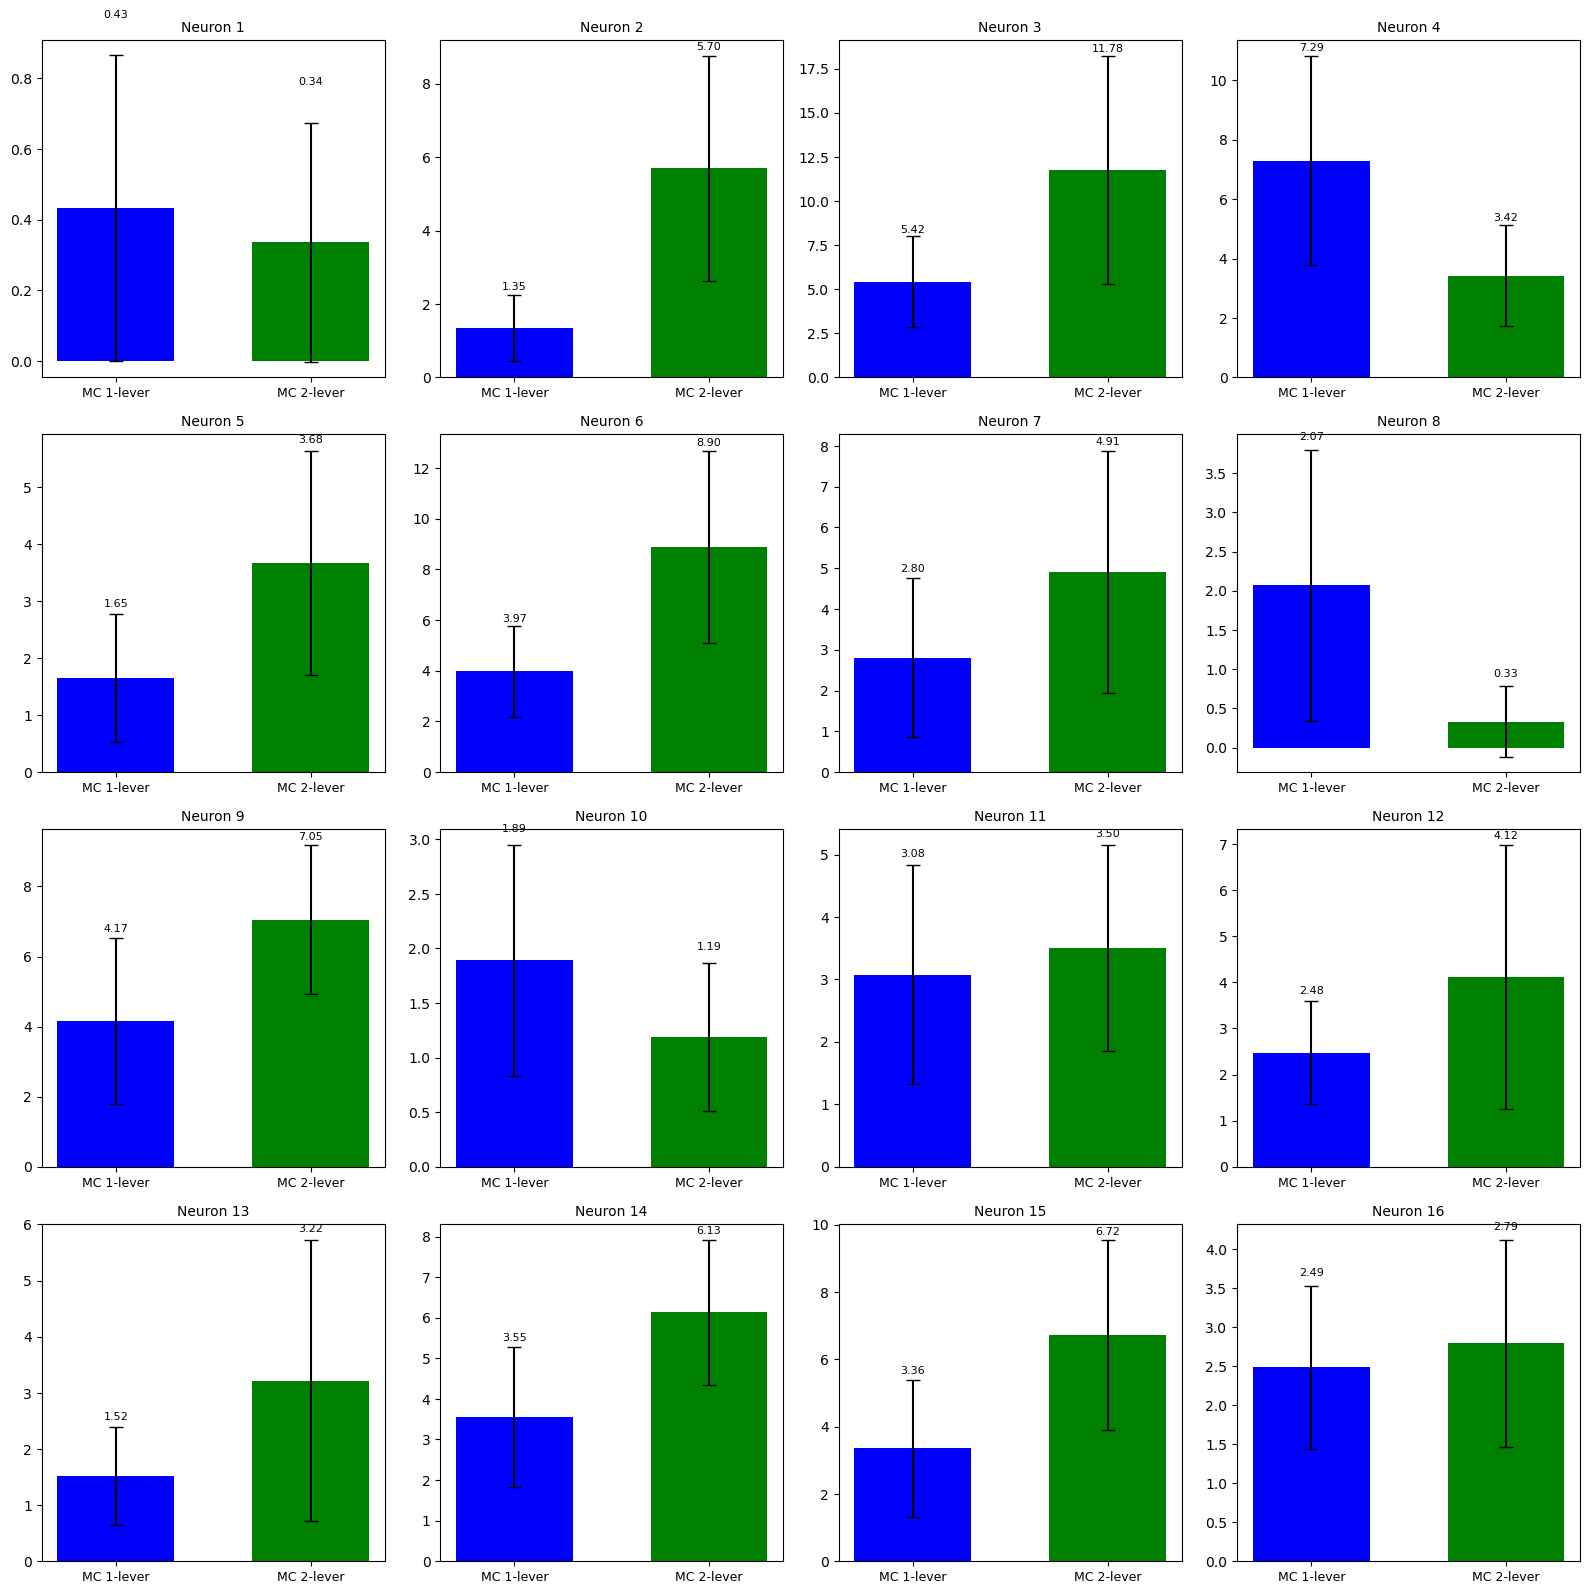

In [45]:
# plot the mean and std of the spikes of each neuron for the two tasks
MC1_spikes_mean = MC1_spikes.mean(1)# torch (16,)
MC1_spikes_std = MC1_spikes.std(1)# torch (16,)
MC2_spikes_mean = MC2_spikes.mean(1) # torch (16,)
MC2_spikes_std = MC2_spikes.std(1) # torch (16,)
# 创建 4x4 的子图网格
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
x_positions = [0, 1]  # 两个 task 的 x 轴位置
bar_width = 0.6

for i in range(16):
    ax = axs[i // 4, i % 4]
    # 获取当前 neuron 的均值和标准差
    means = [MC1_spikes_mean[i], MC2_spikes_mean[i]]
    stds  = [MC1_spikes_std[i], MC2_spikes_std[i]]
    
    # 绘制柱状图，并加上误差条
    ax.bar(x_positions, means, yerr=stds, width=bar_width, capsize=5, color=['blue', 'green'])
    ax.set_title(f"Neuron {i+1}", fontsize=10)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(["MC 1-lever", "MC 2-lever"], fontsize=9)
    
    # 可以在柱子上添加数值标签
    for j, (m, s) in enumerate(zip(means, stds)):
        ax.text(x_positions[j], m + s + 0.1, f"{m:.2f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# plot the mean and std of the spikes of each neuron for the two tasks condition on different actions
MC1_rest_mean = MC1_spikes[:, MC1_actions==0].mean(1)
MC1_rest_std = MC1_spikes[:, MC1_actions==0].std(1)
MC1_press_high_mean = MC1_spikes[:, MC1_actions==1].mean(1)
MC1_press_high_std = MC1_spikes[:, MC1_actions==1].std(1)
MC2_rest_mean = MC2_spikes[:, MC2_actions==0].mean(1)
MC2_rest_std = MC2_spikes[:, MC2_actions==0].std(1)
MC2_press_high_mean = MC2_spikes[:, MC2_actions==1].mean(1)
MC2_press_high_std = MC2_spikes[:, MC2_actions==1].std(1)

In [50]:
MC1_rest_mean.shape

torch.Size([16])